###  Datathon2020 – Predicting weather disruption of public transport – provided by Ernst and Young

This Capstone project was inspired from the Business Case of the just concluded Data Science Society Global 2020 Hackathon hosted from May 15 - 17 , 2020 which i participated in.

click <a href='https://www.datasciencesociety.net/predicting-weather-disruption-of-public-transport/'>here</a> for details about the Business Case and the data dictionary
 
#####  Data Sources : 
The weather dataset used in this project was provided by the organizers, however the external transport data sourced for were obtained <a href='https://www.dubaipulse.gov.ae/organisation/rta/service/rta-public-transports?organisation=rta&service=rta-public-transports&dataset=rta_public_transport_trips_by_type_of_transport_month-open'>here</a> 

### The analysis for this project will follow the CRISP-DM pipeline which are ;
<a id='the_destination'></a>
+ Business Understanding 
+ Data Understanding
+ Data Preparation
+ Data Modelling
+ Results
+ Deployment - Storytelling


###  1. Business Understanding

+ Data Use Case Introduction

Climate change is projected to increase the frequency and intensity of some extreme weather events which is likely to damage transportation infrastructure and cause a disruption in the public transport and increase the risk of delays and failure due to storm, flooding and higher temperatures affecting the reliability and capacity of the public transportation.

+ The Goal

Can you analyze the weather data to predict public transport service disruption in Dubai? How can we plan for less disruption in the wake of severe weather conditions and leverage the emergency management plan as well as providing uninterrupted services and products to citizens?

More details about the business case and the provider of the problem to proffer solution can be find <a href='https://www.datasciencesociety.net/predicting-weather-disruption-of-public-transport/'>here</a>

### 2. Data Understanding and Data Preprocessing 

This stage involves loading the data and performing necessary data cleaning, preprocessing and feature engineering on the data to prepare it for analysis and modelling

+ Importing Necessary Libraries

In [1558]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

import re
%matplotlib inline

plt.style.use('ggplot')
import plotly.graph_objects as go

+ Loading the datasets into a dataframe

In [2256]:
data = pd.read_json('Data/Dubai+Weather_20180101_20200316.txt')
transport = pd.DataFrame(data=None,columns=['year','month','transport_type','trips'])

for i in os.listdir('Transport'):
    month_data = pd.read_csv("Transport/" + i)
    transport = pd.concat([transport,month_data],axis=0)

In [2257]:
data.shape

(19344, 11)

In [2258]:
data.tail(3)

,city_name,lat,lon,main,wind,clouds,weather,dt,dt_iso,timezone,rain
19341,Dubai,25.07501,55.188761,"{'temp': 21.52, 'temp_min': 20, 'temp_max': 23...","{'speed': 3.1, 'deg': 60}",{'all': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1584392400,2020-03-16 21:00:00 +0000 UTC,14400,NaN
19342,Dubai,25.07501,55.188761,"{'temp': 21.04, 'temp_min': 19, 'temp_max': 23...","{'speed': 3.1, 'deg': 70}",{'all': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1584396000,2020-03-16 22:00:00 +0000 UTC,14400,NaN
19343,Dubai,25.07501,55.188761,"{'temp': 20.31, 'temp_min': 18, 'temp_max': 23...","{'speed': 3.6, 'deg': 60}",{'all': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1584399600,2020-03-16 23:00:00 +0000 UTC,14400,NaN


+ Data Preprocessing and Data Cleaning

In [2259]:
transport.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 1
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            95 non-null     object
 1   month           95 non-null     object
 2   transport_type  95 non-null     object
 3   trips           95 non-null     object
dtypes: object(4)
memory usage: 3.7+ KB


In [2260]:
transport.reset_index(inplace=True)
transport.drop('index',axis=1,inplace=True)

In [2261]:
transport.month.unique()

array(['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Jan'], dtype=object)

In [2262]:
def create_id(col):
    year = col[0]
    month = col [1]
    month_map = {'Jan':1, 'Feb':2, 'Mar':3,'Apr':4,
                'May':5, 'Jun':6,'Jul':7,"Aug":8,'Sep':9,
                'Oct':10,'Nov':11,'Dec':12}
    
    if year == 2018:
        return month_map[month]
    elif year== 2019:
        return month_map[month] + 12
    else :
        return month_map[month] + 24

In [2263]:
transport['id'] = transport[['year','month']].apply(create_id,axis=1)

In [2264]:
transport.tail()

,year,month,transport_type,trips,id
90,2020,Mar,Tram,5417,27
91,2020,Mar,Bus,177610,27
92,2020,Mar,Metro,148387,27
93,2020,Apr,Bus,40126,28
94,2020,Apr,Metro,2,28


+ Transforming the date to pandas date format 

+ Dropping columns with constant labels such as `city_name` and `timezone`

In [2265]:
data.drop(['city_name','timezone','dt_iso'],axis=1,inplace=True)

In [2266]:
def convert_time(timestamp):
    return datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')

In [2267]:
data['dt'] = data['dt'].apply(convert_time)
data['dt'] = pd.to_datetime(data['dt'])

In [2268]:
data.head(2)

,lat,lon,main,wind,clouds,weather,dt,rain
0,25.07501,55.188761,"{'temp': 14.99, 'temp_min': 13, 'temp_max': 18...","{'speed': 3.1, 'deg': 150}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",2018-01-01 01:00:00,NaN
1,25.07501,55.188761,"{'temp': 14.63, 'temp_min': 13, 'temp_max': 17...","{'speed': 2.6, 'deg': 150}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",2018-01-01 02:00:00,NaN


In [2269]:
transport.head(2)

,year,month,transport_type,trips,id
0,2018,Feb,Marine,141840,2
1,2018,Feb,Tram,528515,2


####   Feature Engineering 

+ Using the date column created to engineer new date time features such as `Month` and `Year`

In [2270]:
data['month'] = data['dt'].dt.month
data['year'] = data['dt'].dt.year
data['weekdays'] = data['dt'].dt.weekday

In [2271]:
data.head()

,lat,lon,main,wind,clouds,weather,dt,rain,month,year,weekdays
0,25.07501,55.188761,"{'temp': 14.99, 'temp_min': 13, 'temp_max': 18...","{'speed': 3.1, 'deg': 150}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",2018-01-01 01:00:00,NaN,1,2018,0
1,25.07501,55.188761,"{'temp': 14.63, 'temp_min': 13, 'temp_max': 17...","{'speed': 2.6, 'deg': 150}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",2018-01-01 02:00:00,NaN,1,2018,0
2,25.07501,55.188761,"{'temp': 14.03, 'temp_min': 12, 'temp_max': 17...","{'speed': 1.5, 'deg': 150}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",2018-01-01 03:00:00,NaN,1,2018,0
3,25.07501,55.188761,"{'temp': 13.78, 'temp_min': 12, 'temp_max': 17...","{'speed': 2.1, 'deg': 180}",{'all': 1},"[{'id': 701, 'main': 'Mist', 'description': 'm...",2018-01-01 04:00:00,NaN,1,2018,0
4,25.07501,55.188761,"{'temp': 14.28, 'temp_min': 12, 'temp_max': 18...","{'speed': 2.6, 'deg': 160}",{'all': 1},"[{'id': 701, 'main': 'Mist', 'description': 'm...",2018-01-01 05:00:00,NaN,1,2018,0


+ Creating the id in the `data` to be used to map the `Transport` data using the `Create id function`

+ Transforming the `Main` , `Wind`, `Clouds` , `weather` and `rain` columns to extract the details into a proper format to be used for analysis

In [2272]:
data['main'].iloc[0]

{'temp': 14.99,
 'temp_min': 13,
 'temp_max': 18,
 'feels_like': 13.7,
 'pressure': 1015,
 'humidity': 87}

In [2273]:
main = data['main'].astype(str).str.strip('{}').str.split(', ', expand=True)
wind = data['wind'].astype(str).str.strip('{}').str.split(', ', expand=True)
weather = data['weather'].astype(str).str.strip('[{}]').str.split(', ', expand=True)

+ Renaming the Columns

In [2274]:
main.columns = ['Main_temp','Temp_min','Temp_max','Feels_like','Pressure','Humidity']
wind.columns = ['Wind_Speed','Wind_Deg']
weather.columns = ['id','Main','Description','icon','5','6','7','8']
weather.drop(['5','6','7','8'],axis=1,inplace=True)

In [2275]:
data.drop(['main','wind','weather'],axis=1,inplace=True)
data = pd.concat([data,main,wind,weather],axis=1)

In [2276]:
data.head(1)

,lat,lon,clouds,dt,rain,month,year,weekdays,Main_temp,Temp_min,Temp_max,Feels_like,Pressure,Humidity,Wind_Speed,Wind_Deg,id,Main,Description,icon
0,25.07501,55.188761,{'all': 1},2018-01-01 01:00:00,NaN,1,2018,0,'temp': 14.99,'temp_min': 13,'temp_max': 18,'feels_like': 13.7,'pressure': 1015,'humidity': 87,'speed': 3.1,'deg': 150,'id': 800,'main': 'Clear','description': 'sky is clear','icon': '01n'


In [2277]:
data['clouds'] = data['clouds'].astype(str).str.strip('{}').apply(lambda x:x.split(": ")[-1])
data['icon'] = data['icon'].astype(str).str.strip(':').apply(lambda x:x.split(":")[-1])

In [2278]:
data.head()

,lat,lon,clouds,dt,rain,month,year,weekdays,Main_temp,Temp_min,Temp_max,Feels_like,Pressure,Humidity,Wind_Speed,Wind_Deg,id,Main,Description,icon
0,25.07501,55.188761,1,2018-01-01 01:00:00,NaN,1,2018,0,'temp': 14.99,'temp_min': 13,'temp_max': 18,'feels_like': 13.7,'pressure': 1015,'humidity': 87,'speed': 3.1,'deg': 150,'id': 800,'main': 'Clear','description': 'sky is clear','01n'
1,25.07501,55.188761,1,2018-01-01 02:00:00,NaN,1,2018,0,'temp': 14.63,'temp_min': 13,'temp_max': 17,'feels_like': 13.91,'pressure': 1015,'humidity': 93,'speed': 2.6,'deg': 150,'id': 800,'main': 'Clear','description': 'sky is clear','01n'
2,25.07501,55.188761,1,2018-01-01 03:00:00,NaN,1,2018,0,'temp': 14.03,'temp_min': 12,'temp_max': 17,'feels_like': 13.89,'pressure': 1016,'humidity': 93,'speed': 1.5,'deg': 150,'id': 800,'main': 'Clear','description': 'sky is clear','01n'
3,25.07501,55.188761,1,2018-01-01 04:00:00,NaN,1,2018,0,'temp': 13.78,'temp_min': 12,'temp_max': 17,'feels_like': 13.14,'pressure': 1016,'humidity': 93,'speed': 2.1,'deg': 180,'id': 701,'main': 'Mist','description': 'mist','50n'
4,25.07501,55.188761,1,2018-01-01 05:00:00,NaN,1,2018,0,'temp': 14.28,'temp_min': 12,'temp_max': 18,'feels_like': 13.45,'pressure': 1017,'humidity': 93,'speed': 2.6,'deg': 160,'id': 701,'main': 'Mist','description': 'mist','50d'


In [2279]:
def replace_nan(data):
    if pd.isna(data):
        return 0
    else:
        return 1

In [2280]:
data.rain = data.rain.apply(replace_nan)

In [2281]:
data.rain.value_counts()

0    19231
1      113
Name: rain, dtype: int64

In [2282]:
data.head(1)

,lat,lon,clouds,dt,rain,month,year,weekdays,Main_temp,Temp_min,Temp_max,Feels_like,Pressure,Humidity,Wind_Speed,Wind_Deg,id,Main,Description,icon
0,25.07501,55.188761,1,2018-01-01 01:00:00,0,1,2018,0,'temp': 14.99,'temp_min': 13,'temp_max': 18,'feels_like': 13.7,'pressure': 1015,'humidity': 87,'speed': 3.1,'deg': 150,'id': 800,'main': 'Clear','description': 'sky is clear','01n'


In [2283]:
cols1 = ['Main_temp',
      'Feels_like',
      'Wind_Speed']
cols2 = ['Temp_min','Temp_max','Pressure','Humidity','Wind_Deg','id']
   
for column in cols1:
    data[column] = data[column].str.extract(r'(\d+\.\d+)',expand=False)
for column in cols2: 
    data[column] = data[column].str.extract(r'(\d+)',expand=False)

In [2284]:
data.head(2)

,lat,lon,clouds,dt,rain,month,year,weekdays,Main_temp,Temp_min,Temp_max,Feels_like,Pressure,Humidity,Wind_Speed,Wind_Deg,id,Main,Description,icon
0,25.07501,55.188761,1,2018-01-01 01:00:00,0,1,2018,0,14.99,13,18,13.7,1015,87,3.1,150,800,'main': 'Clear','description': 'sky is clear','01n'
1,25.07501,55.188761,1,2018-01-01 02:00:00,0,1,2018,0,14.63,13,17,13.91,1015,93,2.6,150,800,'main': 'Clear','description': 'sky is clear','01n'


In [2285]:
data.isnull().sum()

lat              0
lon              0
clouds           0
dt               0
rain             0
month            0
year             0
weekdays         0
Main_temp      263
Temp_min         0
Temp_max         0
Feels_like     191
Pressure         0
Humidity         0
Wind_Speed     839
Wind_Deg         0
id               0
Main             0
Description      0
icon             0
dtype: int64

In [2286]:
data['Main_temp'].fillna(0,inplace=True)

In [2287]:
def temp_aver(temp):
    temp_min = temp[1]
    temp_max = temp[2]
    main_temp = temp[0]
    if temp_min ==0:
        return (temp_min + temp_max)/2
    else:
        return (temp_min + temp_max+main_temp)/3

In [2288]:
data[['Main_temp','Temp_min','Temp_max']] = data[['Main_temp','Temp_min','Temp_max']].astype('float')
data['temp_average'] =data[['Main_temp','Temp_min','Temp_max']].apply(temp_aver,axis=1)

In [2289]:
data.drop(['Main_temp','Temp_min','Temp_max','dt','Description'],axis=1,inplace=True)

In [2290]:
data.head(2)

,lat,lon,clouds,rain,month,year,weekdays,Feels_like,Pressure,Humidity,Wind_Speed,Wind_Deg,id,Main,icon,temp_average
0,25.07501,55.188761,1,0,1,2018,0,13.7,1015,87,3.1,150,800,'main': 'Clear','01n',15.330000
1,25.07501,55.188761,1,0,1,2018,0,13.91,1015,93,2.6,150,800,'main': 'Clear','01n',14.876667


In [2291]:
def clean_main(text):
    """
    Removing the special characters to clean the text
    
    Args: 
        text : text to be cleaned 
    
    Return:
           A clean data is given as output
    """
    text = re.sub(r"[^a-zA-Z0-9 ]", "", text.lower())
    return text.split(" ")[-1]   

In [2292]:
data['Main'] = data.Main.apply(clean_main)
data['icon'] = data['icon'].apply(clean_main)

In [2293]:
data.head()

,lat,lon,clouds,rain,month,year,weekdays,Feels_like,Pressure,Humidity,Wind_Speed,Wind_Deg,id,Main,icon,temp_average
0,25.07501,55.188761,1,0,1,2018,0,13.7,1015,87,3.1,150,800,clear,01n,15.330000
1,25.07501,55.188761,1,0,1,2018,0,13.91,1015,93,2.6,150,800,clear,01n,14.876667
2,25.07501,55.188761,1,0,1,2018,0,13.89,1016,93,1.5,150,800,clear,01n,14.343333
3,25.07501,55.188761,1,0,1,2018,0,13.14,1016,93,2.1,180,701,mist,50n,14.260000
4,25.07501,55.188761,1,0,1,2018,0,13.45,1017,93,2.6,160,701,mist,50d,14.760000


Given the code description given <a href='https://openweathermap.org/weather-conditions'>here</a> for icon was mapped to extract the data to create new features

In [2294]:
data.icon.unique()

array(['01n', '50n', '50d', '01d', '02n', '04d', '03d', '02d', '03n',
       '04n', '10d', '10n', '09d', '11d', '11n', '09n'], dtype=object)

In [2295]:
icon_map = {'01n' : "Clear Sky", '50n':"Mist", '50d':"Mist", '01d':"Clear Sky", 
            '02n':"Few Clouds", '04d':"Broken Clouds", '03d':"Scatter Clouds",
            '02d':'Few Clouds', '03n':"Scatter Clouds",'04n':"Broken Clouds", 
            '10d':"rain", '10n':"rain", '09d':"Shower rain",'13d':'snow','13n':'snow',
            '11d':"Thunderstorm", '11n':"Thunderstorm", '09n':"Shower rain"}
data['period'] = data['icon'].apply(lambda x:'Night' if 'n' in x else 'Day')
data['icon'] = data['icon'].map(icon_map)

In [2296]:
data.head()

,lat,lon,clouds,rain,month,year,weekdays,Feels_like,Pressure,Humidity,Wind_Speed,Wind_Deg,id,Main,icon,temp_average,period
0,25.07501,55.188761,1,0,1,2018,0,13.7,1015,87,3.1,150,800,clear,Clear Sky,15.330000,Night
1,25.07501,55.188761,1,0,1,2018,0,13.91,1015,93,2.6,150,800,clear,Clear Sky,14.876667,Night
2,25.07501,55.188761,1,0,1,2018,0,13.89,1016,93,1.5,150,800,clear,Clear Sky,14.343333,Night
3,25.07501,55.188761,1,0,1,2018,0,13.14,1016,93,2.1,180,701,mist,Mist,14.260000,Night
4,25.07501,55.188761,1,0,1,2018,0,13.45,1017,93,2.6,160,701,mist,Mist,14.760000,Day


+ Checking the `icon` feature and `Main` feature we see that the weather state is clearly captured which implies that the `icon` & `id` feature is redundant and can be dropped

In [2297]:
data.drop(['icon','id'],axis=1,inplace=True)

In [2298]:
data.head(2)

,lat,lon,clouds,rain,month,year,weekdays,Feels_like,Pressure,Humidity,Wind_Speed,Wind_Deg,Main,temp_average,period
0,25.07501,55.188761,1,0,1,2018,0,13.7,1015,87,3.1,150,clear,15.330000,Night
1,25.07501,55.188761,1,0,1,2018,0,13.91,1015,93,2.6,150,clear,14.876667,Night


In [2299]:
#Creating the id feature to be used to merge the weather data and transport data
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
             5: 'May',6: 'Jun',7: 'Jul', 8: 'Aug',
             9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

data['month_name'] = data['month'].map(month_map)

In [2300]:
data['id'] = data[['year','month_name']].apply(create_id,axis=1)

In [2301]:
data.head()

,lat,lon,clouds,rain,month,year,weekdays,Feels_like,Pressure,Humidity,Wind_Speed,Wind_Deg,Main,temp_average,period,month_name,id
0,25.07501,55.188761,1,0,1,2018,0,13.7,1015,87,3.1,150,clear,15.330000,Night,Jan,1
1,25.07501,55.188761,1,0,1,2018,0,13.91,1015,93,2.6,150,clear,14.876667,Night,Jan,1
2,25.07501,55.188761,1,0,1,2018,0,13.89,1016,93,1.5,150,clear,14.343333,Night,Jan,1
3,25.07501,55.188761,1,0,1,2018,0,13.14,1016,93,2.1,180,mist,14.260000,Night,Jan,1
4,25.07501,55.188761,1,0,1,2018,0,13.45,1017,93,2.6,160,mist,14.760000,Day,Jan,1


+ Merging the transport data and the transport data using the `id` created

In [2302]:
data = pd.merge(data,transport,on='id',how='inner')

In [2303]:
data.head()

,lat,lon,clouds,rain,month_x,year_x,weekdays,Feels_like,Pressure,Humidity,...,Wind_Deg,Main,temp_average,period,month_name,id,year_y,month_y,transport_type,trips
0,25.07501,55.188761,53,0,2,2018,3,14.9,1019,67,...,200,clouds,16.186667,Night,Feb,2,2018,Feb,Marine,141840
1,25.07501,55.188761,53,0,2,2018,3,14.9,1019,67,...,200,clouds,16.186667,Night,Feb,2,2018,Feb,Tram,528515
2,25.07501,55.188761,53,0,2,2018,3,14.9,1019,67,...,200,clouds,16.186667,Night,Feb,2,2018,Feb,Bus,11111573
3,25.07501,55.188761,53,0,2,2018,3,14.9,1019,67,...,200,clouds,16.186667,Night,Feb,2,2018,Feb,Metro,16915232
4,25.07501,55.188761,27,0,2,2018,3,14.77,1019,72,...,210,clouds,15.740000,Night,Feb,2,2018,Feb,Marine,141840


In [2304]:
data.drop(['year_y','month_y','id'],axis=1,inplace=True)

In [2305]:
data.columns = ['lat', 'lon', 'clouds', 'rain', 'month', 'year', 'weekdays',
       'Feels_like', 'Pressure', 'Humidity', 'Wind_Speed', 'Wind_Deg', 'Main',
       'temp_average', 'period', 'month_name', 'transport_type', 'trips']

In [2306]:
data.head()

,lat,lon,clouds,rain,month,year,weekdays,Feels_like,Pressure,Humidity,Wind_Speed,Wind_Deg,Main,temp_average,period,month_name,transport_type,trips
0,25.07501,55.188761,53,0,2,2018,3,14.9,1019,67,2.6,200,clouds,16.186667,Night,Feb,Marine,141840
1,25.07501,55.188761,53,0,2,2018,3,14.9,1019,67,2.6,200,clouds,16.186667,Night,Feb,Tram,528515
2,25.07501,55.188761,53,0,2,2018,3,14.9,1019,67,2.6,200,clouds,16.186667,Night,Feb,Bus,11111573
3,25.07501,55.188761,53,0,2,2018,3,14.9,1019,67,2.6,200,clouds,16.186667,Night,Feb,Metro,16915232
4,25.07501,55.188761,27,0,2,2018,3,14.77,1019,72,2.6,210,clouds,15.740000,Night,Feb,Marine,141840


+ Checking for missing information

In [2307]:
data.isnull().mean()*100

lat               0.000000
lon               0.000000
clouds            0.000000
rain              0.000000
month             0.000000
year              0.000000
weekdays          0.000000
Feels_like        0.957346
Pressure          0.000000
Humidity          0.000000
Wind_Speed        4.182960
Wind_Deg          0.000000
Main              0.000000
temp_average      0.000000
period            0.000000
month_name        0.000000
transport_type    0.000000
trips             0.000000
dtype: float64

In [2308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66747 entries, 0 to 66746
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lat             66747 non-null  float64
 1   lon             66747 non-null  float64
 2   clouds          66747 non-null  object 
 3   rain            66747 non-null  int64  
 4   month           66747 non-null  int64  
 5   year            66747 non-null  int64  
 6   weekdays        66747 non-null  int64  
 7   Feels_like      66108 non-null  object 
 8   Pressure        66747 non-null  object 
 9   Humidity        66747 non-null  object 
 10  Wind_Speed      63955 non-null  object 
 11  Wind_Deg        66747 non-null  object 
 12  Main            66747 non-null  object 
 13  temp_average    66747 non-null  float64
 14  period          66747 non-null  object 
 15  month_name      66747 non-null  object 
 16  transport_type  66747 non-null  object 
 17  trips           66747 non-null 

+ Filling missing information, since both features with missing information have less than `5%` missing values, we will fill with the mean

In [2309]:
data.head(1)

,lat,lon,clouds,rain,month,year,weekdays,Feels_like,Pressure,Humidity,Wind_Speed,Wind_Deg,Main,temp_average,period,month_name,transport_type,trips
0,25.07501,55.188761,53,0,2,2018,3,14.9,1019,67,2.6,200,clouds,16.186667,Night,Feb,Marine,141840


In [2310]:
data['Wind_Speed'] = data['Wind_Speed'].astype('float')
data['Feels_like'] = data['Feels_like'].astype('float')
data['Wind_Speed'].fillna(data['Wind_Speed'].mean(),inplace=True)
data['Feels_like'].fillna(data['Feels_like'].mean(),inplace=True)

In [2311]:
data.isnull().sum()

lat               0
lon               0
clouds            0
rain              0
month             0
year              0
weekdays          0
Feels_like        0
Pressure          0
Humidity          0
Wind_Speed        0
Wind_Deg          0
Main              0
temp_average      0
period            0
month_name        0
transport_type    0
trips             0
dtype: int64

###  3. Exploratory Data Analysis

After cleaning the data and preparing it, Exploratory Data Analysis (EDA) will be performed to gather insights that will be useful for the model to learn from the data to help improve performance of the model

In [2312]:
data.head()

,lat,lon,clouds,rain,month,year,weekdays,Feels_like,Pressure,Humidity,Wind_Speed,Wind_Deg,Main,temp_average,period,month_name,transport_type,trips
0,25.07501,55.188761,53,0,2,2018,3,14.90,1019,67,2.6,200,clouds,16.186667,Night,Feb,Marine,141840
1,25.07501,55.188761,53,0,2,2018,3,14.90,1019,67,2.6,200,clouds,16.186667,Night,Feb,Tram,528515
2,25.07501,55.188761,53,0,2,2018,3,14.90,1019,67,2.6,200,clouds,16.186667,Night,Feb,Bus,11111573
3,25.07501,55.188761,53,0,2,2018,3,14.90,1019,67,2.6,200,clouds,16.186667,Night,Feb,Metro,16915232
4,25.07501,55.188761,27,0,2,2018,3,14.77,1019,72,2.6,210,clouds,15.740000,Night,Feb,Marine,141840


In [2313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66747 entries, 0 to 66746
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lat             66747 non-null  float64
 1   lon             66747 non-null  float64
 2   clouds          66747 non-null  object 
 3   rain            66747 non-null  int64  
 4   month           66747 non-null  int64  
 5   year            66747 non-null  int64  
 6   weekdays        66747 non-null  int64  
 7   Feels_like      66747 non-null  float64
 8   Pressure        66747 non-null  object 
 9   Humidity        66747 non-null  object 
 10  Wind_Speed      66747 non-null  float64
 11  Wind_Deg        66747 non-null  object 
 12  Main            66747 non-null  object 
 13  temp_average    66747 non-null  float64
 14  period          66747 non-null  object 
 15  month_name      66747 non-null  object 
 16  transport_type  66747 non-null  object 
 17  trips           66747 non-null 

In [2314]:
data.trips = data.trips.astype('float')

In [2315]:
data.head()

,lat,lon,clouds,rain,month,year,weekdays,Feels_like,Pressure,Humidity,Wind_Speed,Wind_Deg,Main,temp_average,period,month_name,transport_type,trips
0,25.07501,55.188761,53,0,2,2018,3,14.90,1019,67,2.6,200,clouds,16.186667,Night,Feb,Marine,141840.0
1,25.07501,55.188761,53,0,2,2018,3,14.90,1019,67,2.6,200,clouds,16.186667,Night,Feb,Tram,528515.0
2,25.07501,55.188761,53,0,2,2018,3,14.90,1019,67,2.6,200,clouds,16.186667,Night,Feb,Bus,11111573.0
3,25.07501,55.188761,53,0,2,2018,3,14.90,1019,67,2.6,200,clouds,16.186667,Night,Feb,Metro,16915232.0
4,25.07501,55.188761,27,0,2,2018,3,14.77,1019,72,2.6,210,clouds,15.740000,Night,Feb,Marine,141840.0


In [2316]:
# Exploring the rain feautures to determine the impact on transport trips completed

In [2317]:
data[data.rain==1].head()

,lat,lon,clouds,rain,month,year,weekdays,Feels_like,Pressure,Humidity,Wind_Speed,Wind_Deg,Main,temp_average,period,month_name,transport_type,trips
2272,25.07501,55.188761,82,1,2,2018,5,26.60,1008,45,4.6,360,rain,28.39,Night,Feb,Marine,141840.0
2273,25.07501,55.188761,82,1,2,2018,5,26.60,1008,45,4.6,360,rain,28.39,Night,Feb,Tram,528515.0
2274,25.07501,55.188761,82,1,2,2018,5,26.60,1008,45,4.6,360,rain,28.39,Night,Feb,Bus,11111573.0
2275,25.07501,55.188761,82,1,2,2018,5,26.60,1008,45,4.6,360,rain,28.39,Night,Feb,Metro,16915232.0
2300,25.07501,55.188761,100,1,2,2018,5,25.21,1009,50,2.6,70,rain,25.54,Night,Feb,Marine,141840.0


+ Checking the `rain` feature and `main` feature we see that the rain also captured which implies that the binary feature `rain` is redundant and can be dropped

In [2318]:
data.drop(['rain'],axis=1,inplace=True)

In [2319]:
data[data['Main']=='clouds']['clouds'].min()

'100'

In [2320]:
data.head(2)

,lat,lon,clouds,month,year,weekdays,Feels_like,Pressure,Humidity,Wind_Speed,Wind_Deg,Main,temp_average,period,month_name,transport_type,trips
0,25.07501,55.188761,53,2,2018,3,14.9,1019,67,2.6,200,clouds,16.186667,Night,Feb,Marine,141840.0
1,25.07501,55.188761,53,2,2018,3,14.9,1019,67,2.6,200,clouds,16.186667,Night,Feb,Tram,528515.0


In [2321]:
data.drop(['month'],axis=1,inplace=True)

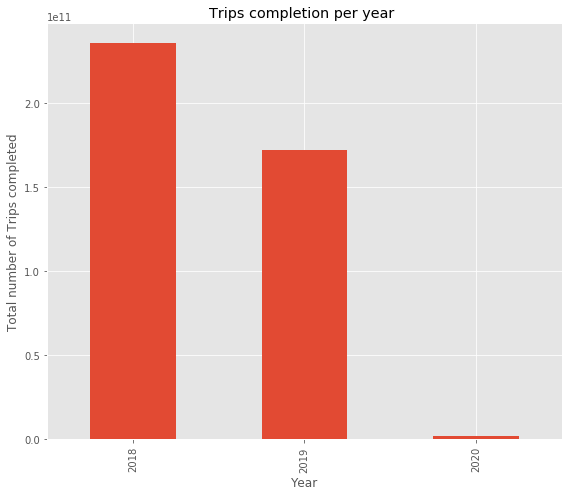

In [2322]:
plt.figure(figsize = (8,7))
data.groupby(['year'])['trips'].sum().plot.bar()
plt.xlabel('Year')
plt.ylabel('Total number of Trips completed')
plt.title('Trips completion per year ')
plt.tight_layout()

From above we see that `2018` had the highest number of trips completed with a decline in `2019` and `2020`. It important to perform a diagnostics analysis to understand why the decline in 2019 to help in preventing the disruption in 2020 which is already showing. 
 
In answering the questions of how and what happened, we will check ;

+ The Weather Condition for High Trips completed for the Major Transport type in 2018 & 2019
+ The weather condition for less Trips completed for the major tranport type in 2018 & 2019
+ Compare the above insights from 2018 & 2019 to check the current status of 2020. 

Insights from the diagnostic analysis will be useful in engineering new features that will be used to train the machine learning model to make predictioin of what the transport trips completion status will be with respect a given weather condition

 
 
 
###### Transport Type Analysis

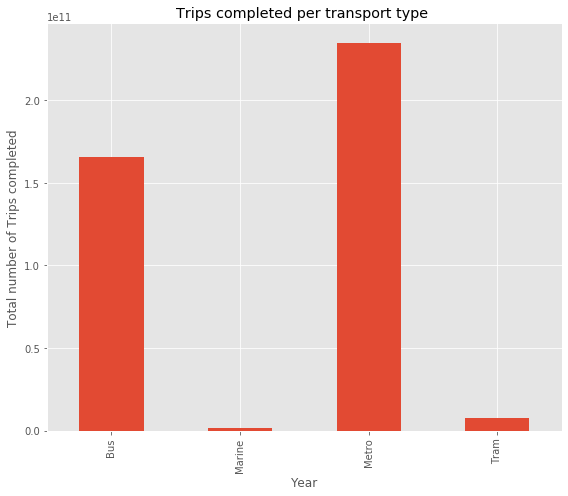

In [2323]:
plt.figure(figsize = (8,7))
data.groupby(['transport_type'])['trips'].sum().plot.bar()
plt.xlabel('Year')
plt.ylabel('Total number of Trips completed')
plt.title('Trips completed per transport type ')
plt.tight_layout()

 + From above we see that `Metro` and `Bus` transport type had the highest trip completion across the years, `Marine` and `Tram` had little trip completions, hence we can combined both `Marine` & `Tram` to a unique label `Others` to help improve the machine learning model
 
 
 + Checking which period of the day were trip completed most across all the years

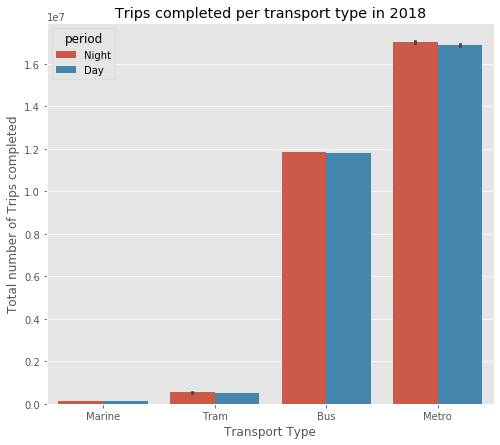

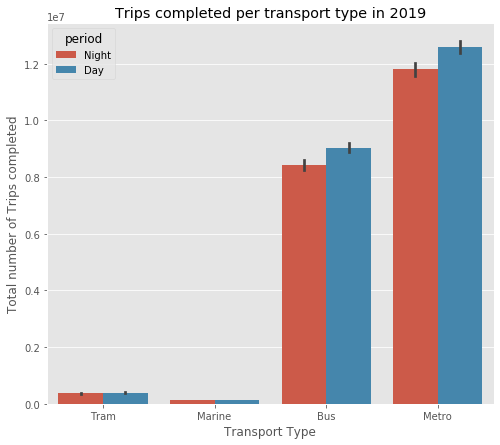

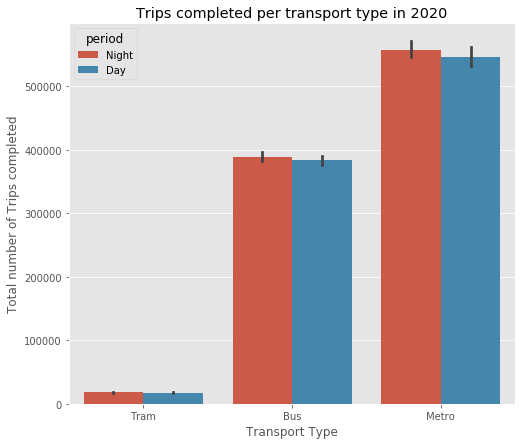

In [2324]:
year = [2018,2019,2020]

for i in year:
    plt.figure(figsize = (8,7))
    data_year = data[data['year']==i]
    sns.barplot(x='transport_type',y='trips',data=data_year,hue='period')  
    plt.xlabel('Transport Type')
    plt.ylabel('Total number of Trips completed')
    plt.title('Trips completed per transport type in '+ str(i))

From the chart above we see that in `2018` there seems to be an even distribution in the number of trips completed during the day and at Night for both `Metro` and `Bus` which are the most patronized transport type. In `2019` more trips were completed during the day, however in `2020` so far trips are completed a little more at Night than at Day


###### Main Weather Analysis on Transport type trip completion

In [2325]:
data.Main.value_counts()

clear           43508
clouds          15904
dust             4183
haze             1658
rain              603
mist              462
fog               305
thunderstorm      108
smoke              16
Name: Main, dtype: int64

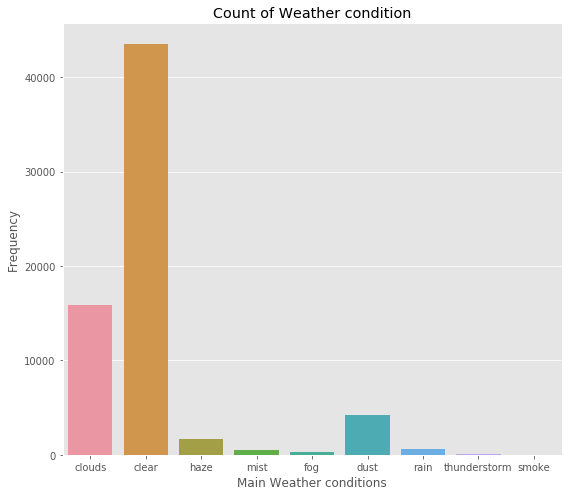

In [2326]:
plt.figure(figsize = (8,7))
sns.countplot(x='Main',data=data)
plt.xlabel('Main Weather conditions')
plt.ylabel('Frequency')
plt.title('Count of Weather condition')
plt.tight_layout()

We see that `Clouds` , `Clear` & `Dust` weather condition are the most common, we can classify some of the less common which are similar such as `mist`, `fog` ,`smoke` and `Dust` as `Atmosphere`

In [2327]:
data.Main.unique()

array(['clouds', 'clear', 'haze', 'mist', 'fog', 'dust', 'rain',
       'thunderstorm', 'smoke'], dtype=object)

In [2328]:
cloud_map = {'clouds':'clouds','clear':'clear','haze':'atmosphere','mist':'atmosphere',
             'fog':'atmosphere','dust':'atmosphere','smoke':'atmosphere',
             'thunderstorm':'thunderstorm','rain':'rain'}
data.Main = data.Main.map(cloud_map)

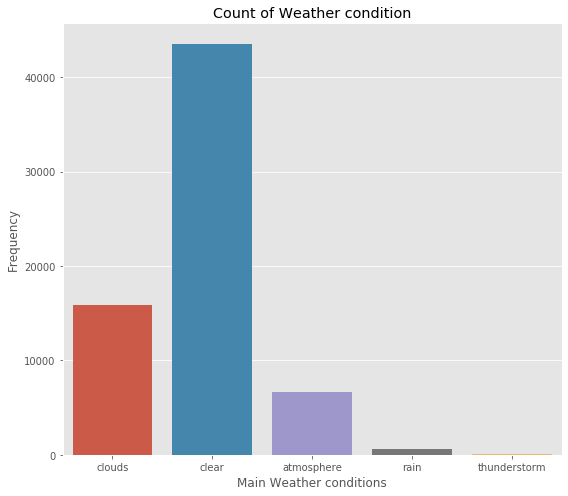

In [2329]:
plt.figure(figsize = (8,7))
sns.countplot(x='Main',data=data)
plt.xlabel('Main Weather conditions')
plt.ylabel('Frequency')
plt.title('Count of Weather condition')
plt.tight_layout()

In [2330]:
def plot_weather(data,year): 
    """Plot of weather analysis for the trips completed in a year
    
    Args:
        data : dataframe to be use to make the visualization
        year : The year in scope to analyze
        
    Return:
          Display of the visualization
    """
    print("Weather Condition Analysis of Trips Completed in year {}".format(year))
    weather = data.Main.unique().tolist()
    plt.subplots(3,2,figsize=(20,20))
    for k,i in enumerate(weather,1):
        plt.subplot(3,2,k)
        data_weather = data[(data['Main']==i) & (data['year']==year)]
        sns.barplot(x='transport_type',y='trips',data=data_weather,hue='period')  
        plt.xlabel('Transport Type',fontsize=16)
        plt.ylabel('Total number of Trips completed',fontsize=16)
        plt.title('Trips completed per transport type due to '+ str(i),fontsize=16)
        plt.tight_layout()

Weather Condition Analysis of Trips Completed in year 2018


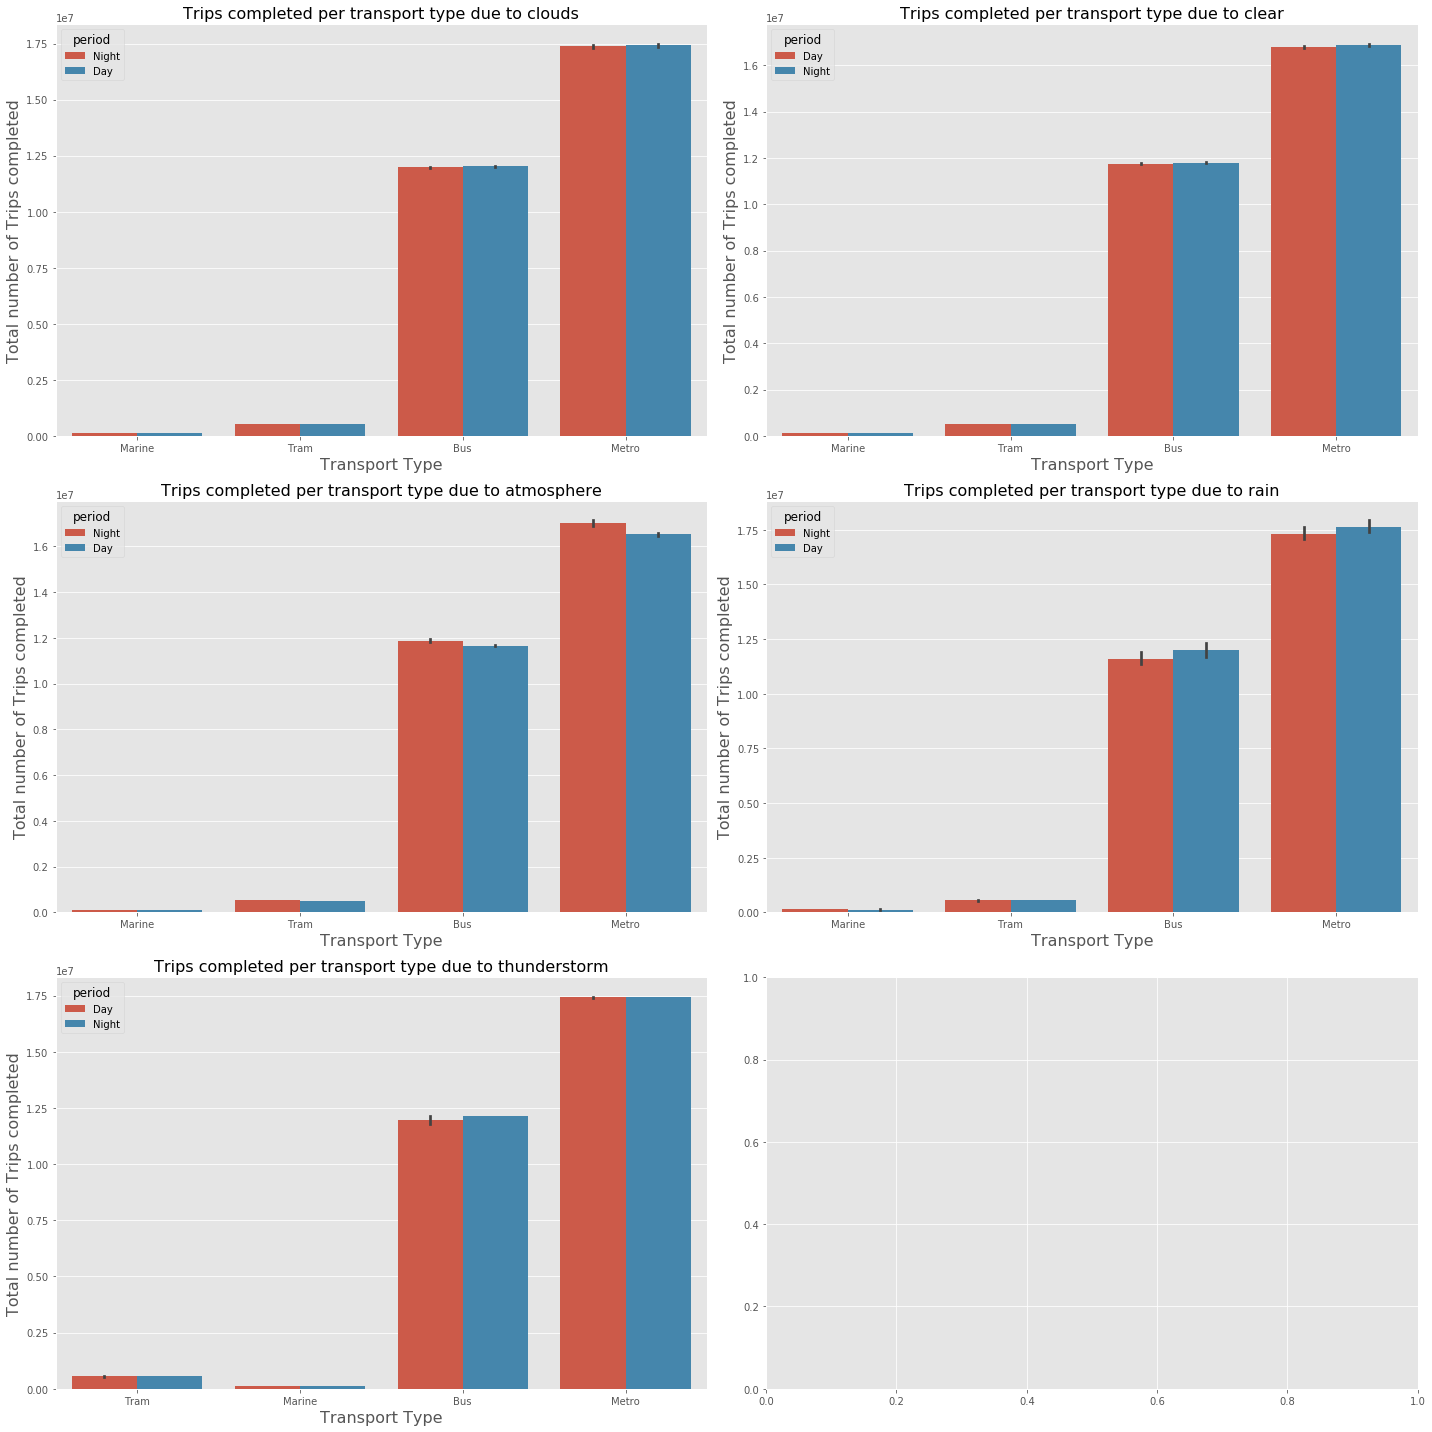

In [2331]:
plot_weather(data,2018)

Weather Condition Analysis of Trips Completed in year 2019


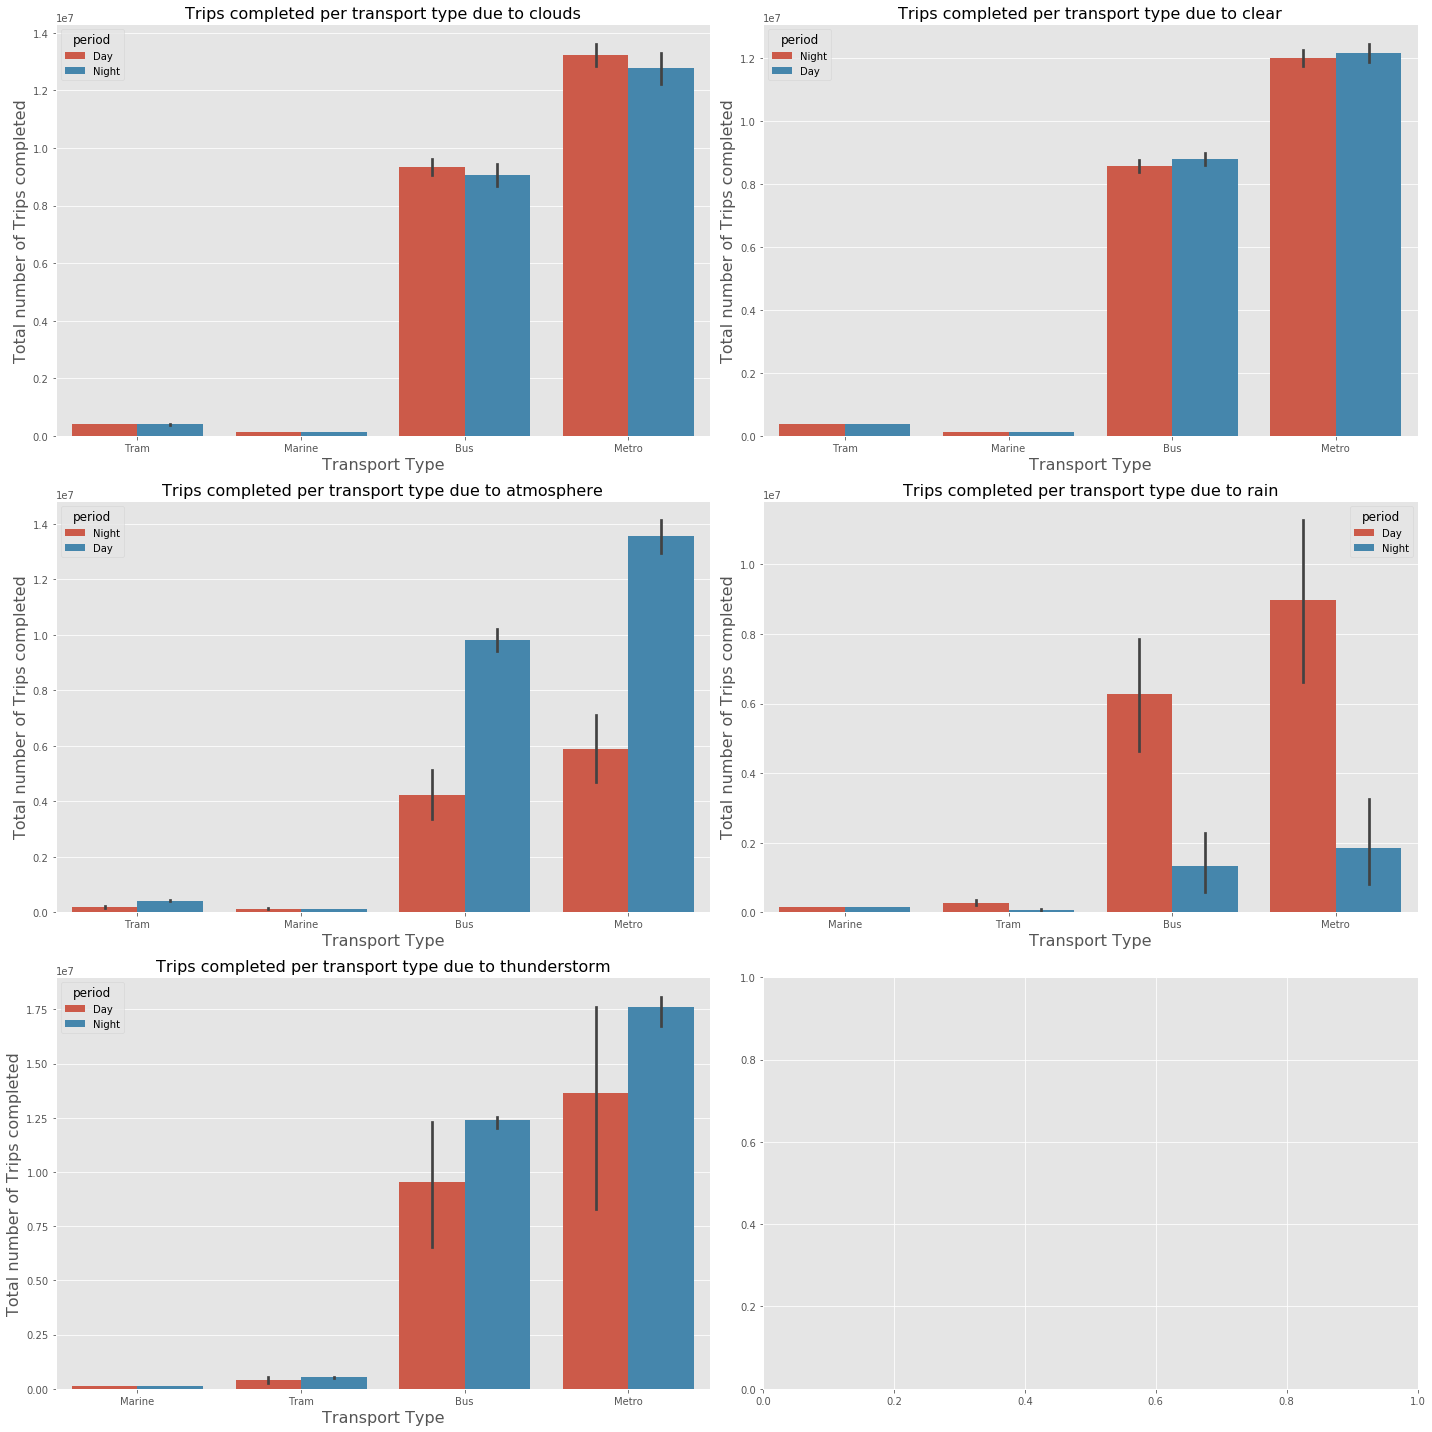

In [2332]:
plot_weather(data,2019)

Weather Condition Analysis of Trips Completed in year 2020


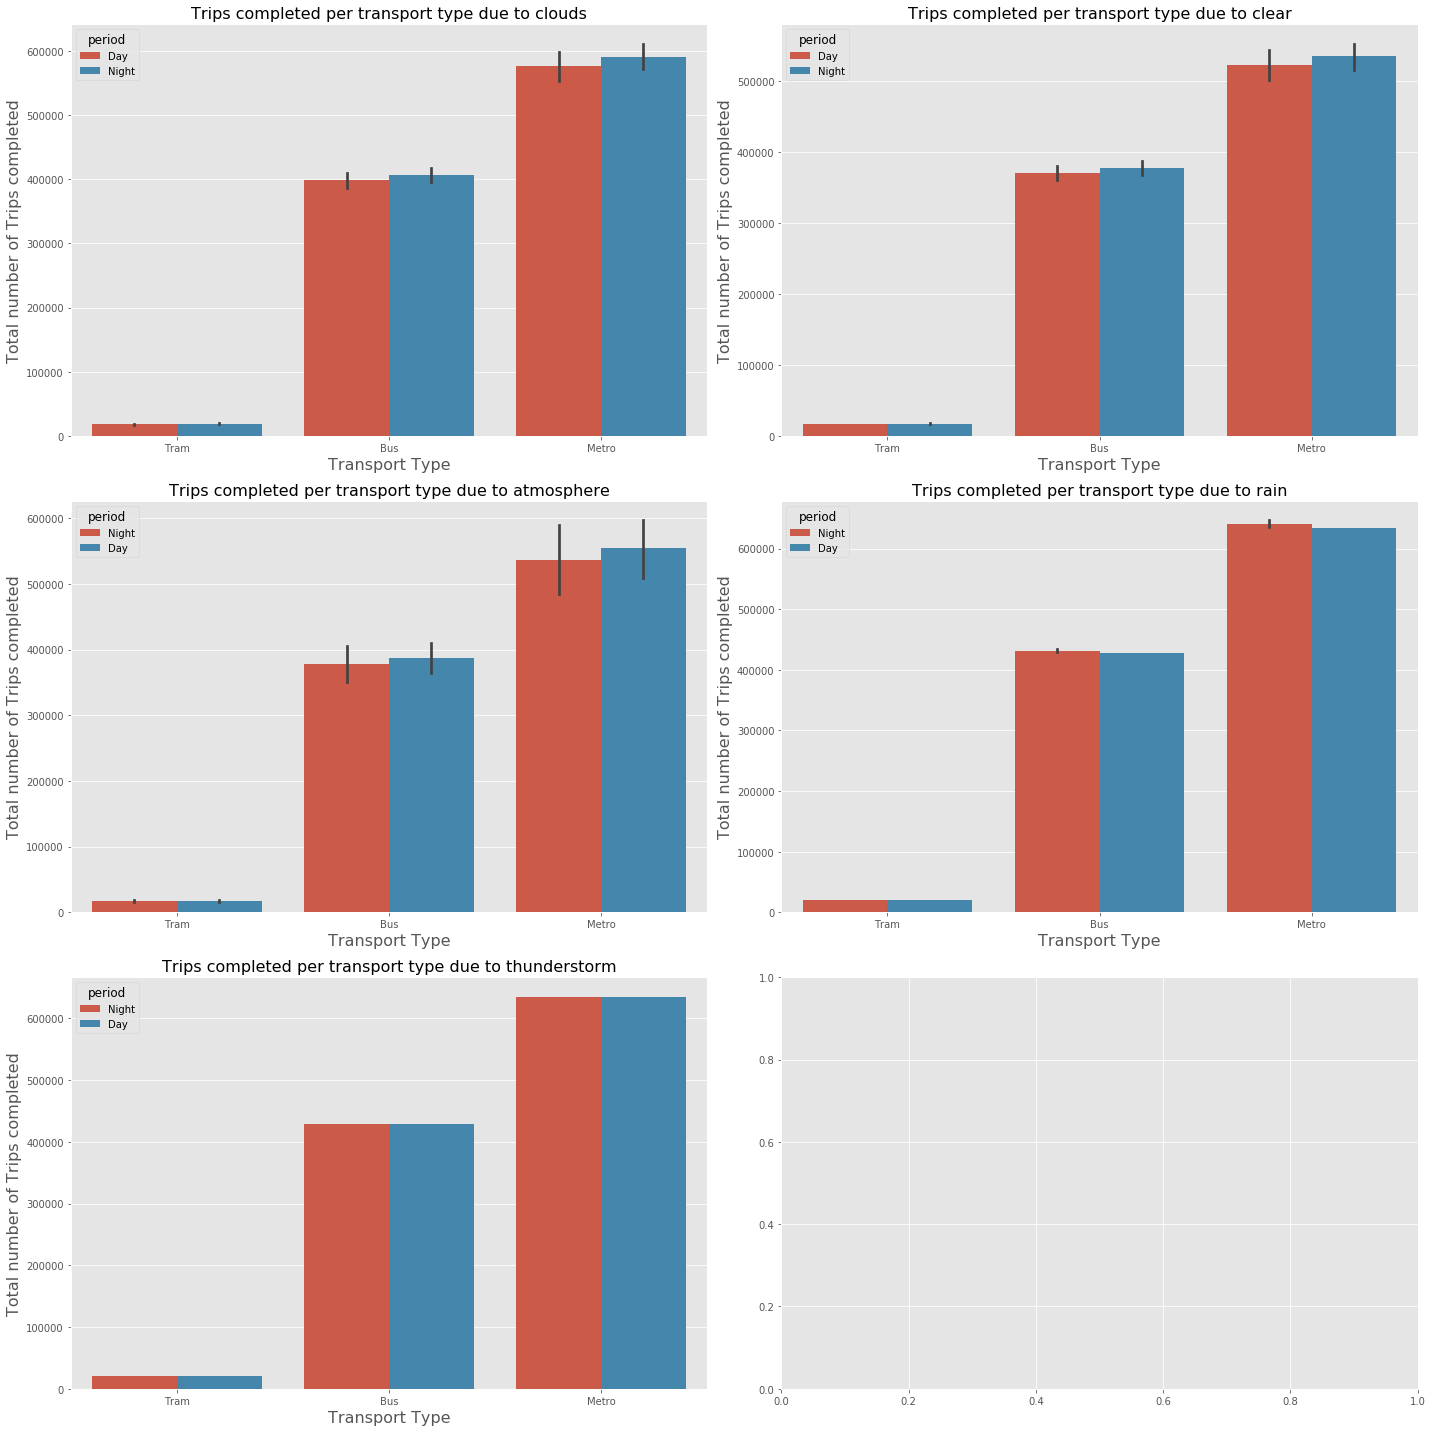

In [2333]:
plot_weather(data,2020)

#### Insights Generated 

After analysis the weather condition across the years to determine the impact on trips completion, the following information was observed;

+ Given that `2018` had the highest number of trips completed, the trip completion rate was evenly distributed for both periods of `Day` & `Night` for all the weather condition with `Clear` & `Clouds` condition having the highest proportion of trips completed which can be term as `good weathers`. A focus on what can be term as bad weather `Rain` & `Thunderstorm`, we see that 
though the number of trips completed is less compared to the good weather condition, however the trips completion rate was also evenly distributed for both periods of `Day` and `Night`

+ In 2019, a focus on the bad weather condition `Rain` & `thunderstorm` when compared to the trips completion rate for 2018, we observed a varying different in the trip completion rate where;
1. Less trips were completed at Night during `Raining` weather condition and an uneven distribution of trips completion for between `Day` and `Night`
2. More trips were completed at Night during `Thunderstorm` weather condition and also unevenly distributed
3. Few trips were completed at Night during `Atmosphere` weather condition such as `Fog` , `Mist` , `Smoke` etc


An Hypothesis we can draw is that there is a possiblity that when there is `Rain` which is accompanied by `Thunderstorm` trip completion rate is drastically reduced during the `Day` with a minute tradeoff of little increase in trip completion at `Night`. 

To reject or accept the hypothesis the following will be performed;

- Explore the raining season with domain knowledge to determine the impact on trips completion in 2018 & 2020

According to the research <a href='https://www.climatestotravel.com/climate/united-arab-emirates/dubai'>here</a>, it is important to note that `Rainfall` in Dubai is infrequent and does not last for a long period. It mostly rains during the winter period between `December and March` in the form of short downpours and an **occasional thunderstorm.**

First let's explore the year that had ` Occassional Thunderstorm` during the raining season

Text(0.5, 1.0, 'Occassional thunderstorm conditions distribution count per year')

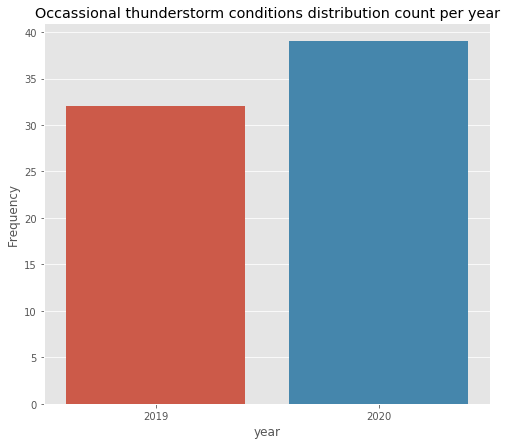

In [2334]:
plt.figure(figsize = (8,7))
Raining_period = ['Dec','Jan','Feb','Mar']
data_rain = data[data['month_name'].isin(Raining_period)]
thunderstorm = data_rain[(data_rain['Main']=='thunderstorm')]
sns.countplot(x='year',data=thunderstorm)
plt.xlabel('year')
plt.ylabel('Frequency')
plt.title('Occassional thunderstorm conditions distribution count per year')

It is interesting to know that there was no `occassional thunderstorm` in year 2018 at all as against the corresponding year 2019 & 2020 which experienced an occassional thunderstorm with `2020` having the highest impact of the condition. An interesting discovery it is which implies that we can accept the `Null Hypothesis` that `Thunderstorm` really have a significant impact the transport trip completion. 

we can further explore the `windspeed` as well as the `pressure` to be definite on the type of `Thunderstorm` that impact trip completion more given that there are different types of `Thunderstorm` such as ;
+ Thunderstorm with light rain
+ Thunderstorm with Heavy rain
+ Thunderstorm with light drizzle
+ Thunderstorm with heavy drizzle etc. as explained <a href='https://openweathermap.org/weather-conditions'>here</a>

This project wouldn't be drilling down and exploring further. However, with the insights gathered we can Engineer a binary feature which check if there was thunderstorm or not for our model to learn 

In [2335]:
def plot_badweather(data,year): 
    """Plot of weather analysis for the trips completed in a year
    
    Args:
        data : dataframe to be use to make the visualization
        year : The year in scope to analyze
        
    Return:
          Display of the visualization
    """
    Raining_period = ['Dec','Jan','Feb','Mar']
    data_rain = data[data['month_name'].isin(Raining_period)]
    print("Bad weather Analysis of Trips Completed in year {}".format(year))
    weather = ['rain','thunderstorm']
    plt.subplots(2,1,figsize=(10,10))
    for k,i in enumerate(weather,1):
        plt.subplot(2,1,k)
        data_weather = data_rain[(data_rain['Main']==i) & (data_rain['year']==year)]
        sns.barplot(x='transport_type',y='trips',data=data_weather,hue='period')  
        plt.xlabel('Transport Type')
        plt.ylabel('Total number of Trips completed')
        plt.title('Trips completed per transport type due to '+ str(i))
        plt.tight_layout()

Bad weather Analysis of Trips Completed in year 2019


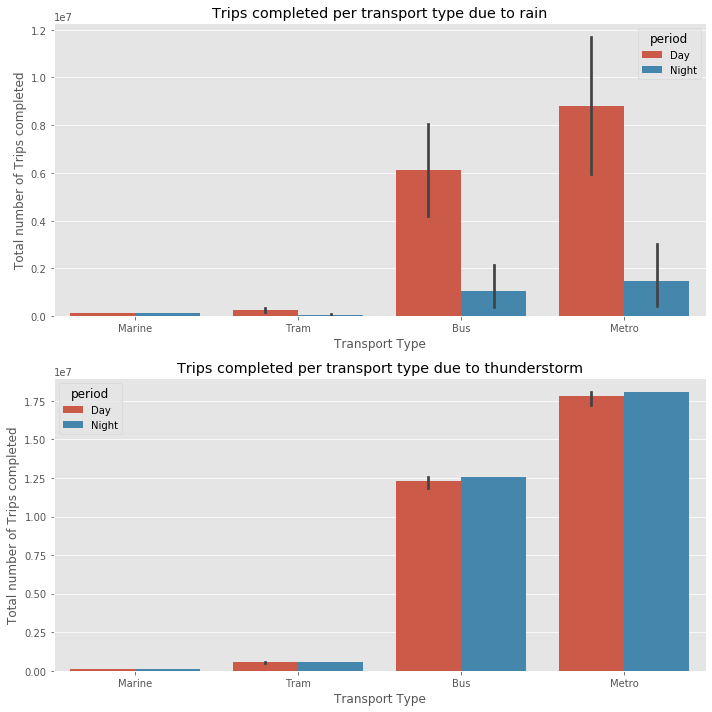

In [2336]:
plot_badweather(data,2019)

Bad weather Analysis of Trips Completed in year 2020


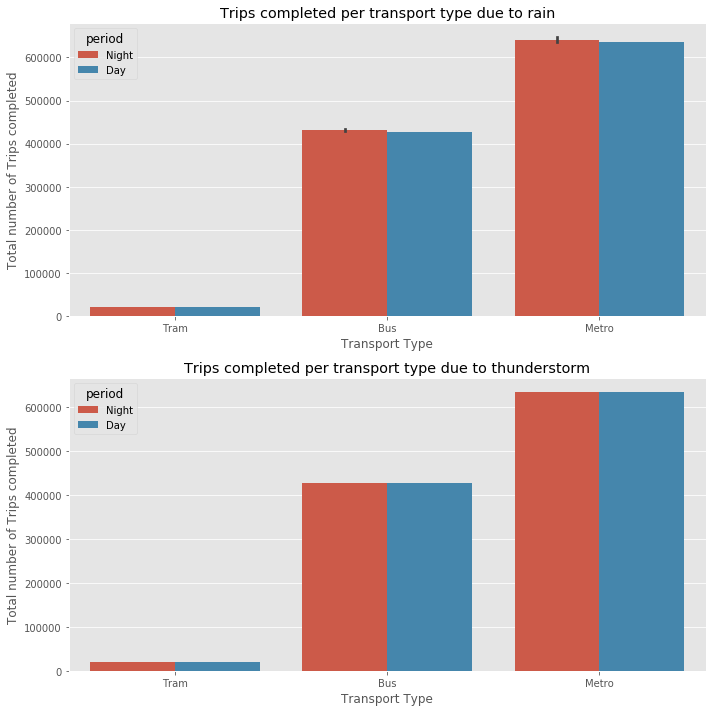

In [2337]:
plot_badweather(data,2020)

+ Checking to see if there are correlated features which will have similar relationship with the target to drop

### Remove Correlated Features

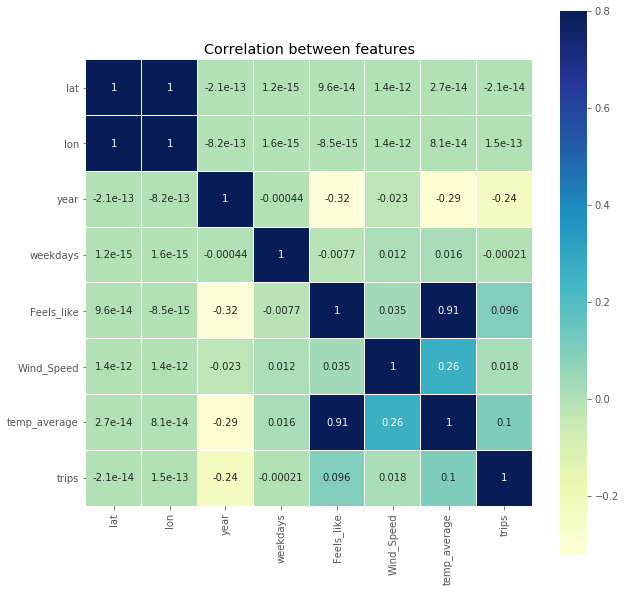

In [2338]:
corr=data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

As seen that some features are correlated `Feels_like` & `temp_average` & `lon` & `lat` , an option will be to drop one of the features if after evaluation the trained model isn't improved also to help improve **Interpretability of the model**

### Feature Engineering 

Transforming all the categorical features to numerical that can be used to train the machine learning model

In [2339]:
thunder_map = {'clear':0,'clouds':0,'atmosphere':0,'rain':0,'thunderstorm':1}
year_map = {2018:1,2019:2,2020:3}
main_map = {'clear':'clear','clouds':'clouds','rain':'others','thunderstorm':'others','atmosphere':'atmosphere'}
data['Thunderstorm'] = data['Main'].map(thunder_map)
data['year'] =data['year'].map(year_map)
data['Main'] = data['Main'].map(main_map)

In [2340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66747 entries, 0 to 66746
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lat             66747 non-null  float64
 1   lon             66747 non-null  float64
 2   clouds          66747 non-null  object 
 3   year            66747 non-null  int64  
 4   weekdays        66747 non-null  int64  
 5   Feels_like      66747 non-null  float64
 6   Pressure        66747 non-null  object 
 7   Humidity        66747 non-null  object 
 8   Wind_Speed      66747 non-null  float64
 9   Wind_Deg        66747 non-null  object 
 10  Main            66747 non-null  object 
 11  temp_average    66747 non-null  float64
 12  period          66747 non-null  object 
 13  month_name      66747 non-null  object 
 14  transport_type  66747 non-null  object 
 15  trips           66747 non-null  float64
 16  Thunderstorm    66747 non-null  int64  
dtypes: float64(6), int64(3), object

In [2341]:
columns = ['Main','weekdays','period','transport_type','month_name']
data = pd.get_dummies(data,columns=columns,drop_first=True)
data[['Pressure','Humidity','Wind_Deg','clouds']] = data[['Pressure','Humidity','Wind_Deg','clouds']].astype('float')

###  4. Data Modelling 

This is the phase where a Machine learn model is trained using all the explanatory features to make prediction for the target label `Trips`. `Trips` is selected as the target label given that the goal of the project is to predict disruption of Dubai public transport which can be interpreted as the impact of weather on commutation which is the trips completed.

The evaluation metrics to be used to evaluate the performance of the model is `R_squared` to help determine how the explanatory features are significant in explaining the variability of the target 

+ Importing important libraries required for modelling

In [2345]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

+ Creating a Validation Set to be used to select a baseline model

In [2346]:
# Split-out validation dataset
X = data.drop(['trips'],axis=1)
Y= data['trips']
validation_size = 0.20
seed = 7
X_train, X_validation, ytrain, yvalidation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [2347]:
X_train.shape, X_validation.shape

((53397, 35), (13350, 35))

In [2348]:
num_folds = 10
seed = 7
R2 = 'r2'
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RF',RandomForestRegressor()))
models.append(('GB',GradientBoostingRegressor()))

### 5. Result and Evalution

After selecting all the algorithms to be used to train the machine learning model, the results need will be evaluated to select the baseline model to improve.

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, ytrain, cv=kfold, scoring=R2)
    results.append(abs(cv_results))
    names.append(name)
    msg = '{}: {} {}'.format(name, abs(cv_results.mean()), abs(cv_results.std()))
    print(msg)

LR: 0.7724538353110713 0.004688685956395516
KNN: 0.06913799588491851 0.013173344887201933
CART: 0.9999969640104516 4.12951181730776e-06


#### Compare Algorithms

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# preparing the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(r(Y_validation, predictions))

### 6. Deployment

The Deployment to be executed for this project will be in the form of story telling using a blog or article which is available <a href='#'>here</a> for your consumption and don't forget to drop your feedbacks.
A web application may be considered in the future as well as further analysis to discover insights that will be useful in training the machine learning model to improve the current performance of the model in making predictions for unseen future data. 

Thank you for the time